# Text Classification

## 1 - Library Imports

In [1]:
%reset -f

# Import Os to get to the root directory
import os
import sys

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)

TEST_DIR = os.path.join(ROOT_DIR, "test-white-papers")
MODEL_DIR = os.path.join(ROOT_DIR, "model")

# Change Keras Environment to Theano, in case Tensorflow doesn't work
#import os; os.environ['KERAS_BACKEND'] = 'theano'

# Import own functions
from libraries import corpus
from libraries import pdf2text

##########################
# Import other libraries
##########################

# Data Processing and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Text Analysis
import nltk 

# Machine Learning Libraries
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

import itertools
import io
import json

# Tensorflow Utilities
import tensorflow as tf
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

# Neural Network Libraries
from tensorflow import keras
from keras import utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
# To reload own libraries when a change is made
from importlib import reload
reload(corpus)

<module 'libraries.corpus' from '/Users/ldiego/Documents/GitHub/datascience_project/libraries/corpus.py'>

## 2 - Data Preprocessing

In [3]:
# Retrieving the PDF files from white-paper folder and converting them to text
dataset = pdf2text.get_dataset()

In [4]:
# Print all the white papers' names
dataset.keys()

dict_keys(['utrust', 'ark', 'bitcoin', 'icon', 'basicattentiontoken', 'dash', 'bytecoin', 'horizen', 'abbccoin', 'komodo', 'hyperion', 'tezos', 'nexo', 'dai', 'tron', 'fantom', 'digixdao', 'cryptonex', 'maker', 'bytom', 'metal', 'dogecoin', 'pundix', 'japancontenttoken', 'cosmos', 'latoken', 'nem', 'maidsafecoin', 'decentraland', 'mixin', 'stellar', 'elastos', 'gxchain', 'nebulas', 'solve', 'eos', 'theta', 'stratis', 'tether', 'iexecrlc', 'orbs', 'dent', 'ethereum', 'vechain', 'hypercash', 'bitcoingold', 'status', 'ravencoin', 'thetafuel', 'zilliqa', 'celernetwork', 'omisego', 'singularitynet', 'usdcoin', 'holo', 'synthetixnetworktoken', 'bitshares', '0x', 'nkn', 'riftoken', 'waves', '#metahash', 'powerledger', 'siacoin', 'wanchain', 'enjincoin', 'loopring', 'factom', 'crypto', 'ontology', 'particl', 'metaverseetp', 'zcash', 'aion', 'skycoin', 'iota', 'binancecoin', 'chainlink', 'wax', 'bhpcoin', 'bittorrent', 'paxosstandardtoken', 'thundertoken', 'inocoin', 'apollocurrency', 'cosmocoi

In [5]:
# Print the size of the Train dataset
len(dataset.keys())

99

In [6]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = True
# Creates a dictionary with each White Paper and its text pre-processed
corpora_sent = corpus.makeCleanCorpus(dataset, lemmatize=True, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True, removeEnt=True)

[nltk_data] Downloading package punkt to /Users/ldiego/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ldiego/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ldiego/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/ldiego/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: utrust
Cleaning: ark
Cleaning: bitcoin
Cleaning: icon
Cleaning: basicattentiontoken
Cleaning: dash
Cleaning: bytecoin
Cleaning: horizen
Cleaning: abbccoin
Cleaning: komodo
Cleaning: hyperion
Cleaning: tezos
Cleaning: nexo
Cleaning: dai
Cleaning: tron
Cleaning: fantom
Cleaning: digixdao
Cleaning: cryptonex
Cleaning: maker
Cleaning: bytom
Cleaning: metal
Cleaning: dogecoin
Cleaning: pundix
Cleaning: japancontenttoken
Cleaning: cosmos
Cleaning: latoken
Cleaning: nem
Cleaning: maidsafecoin
Cleaning: decentraland
Cleaning: mixin
Cleaning: stellar
Cleaning: elastos
Cleaning: gxchain
Cleaning: nebulas
Cleaning: solve
Cleaning: eos
Cleaning: theta
Cleaning: stratis
Cleaning: tether
Cleaning: iexecrlc
Cleaning: orbs
Cleaning: dent
Cleaning: ethereum
Cleaning: vechain
Cleaning: hypercash
Cleaning: bitcoingold
Cleaning: status
Cleaning: ravencoin
Cleaning: thetafuel
Cleaning: zilliqa
Cleaning: celernetwork
Cleaning: omisego
Cleaning: singularitynet
Cleaning: usdcoin
Cleaning: holo
Clean

In [7]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = False
# Creates a dictionary with each White Paper and its text pre-processed
corpora_whole = corpus.makeCleanCorpus(dataset, lemmatize=True, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True, removeEnt=True)

[nltk_data] Downloading package punkt to /Users/ldiego/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ldiego/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ldiego/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/ldiego/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: utrust
Cleaning: ark
Cleaning: bitcoin
Cleaning: icon
Cleaning: basicattentiontoken
Cleaning: dash
Cleaning: bytecoin
Cleaning: horizen
Cleaning: abbccoin
Cleaning: komodo
Cleaning: hyperion
Cleaning: tezos
Cleaning: nexo
Cleaning: dai
Cleaning: tron
Cleaning: fantom
Cleaning: digixdao
Cleaning: cryptonex
Cleaning: maker
Cleaning: bytom
Cleaning: metal
Cleaning: dogecoin
Cleaning: pundix
Cleaning: japancontenttoken
Cleaning: cosmos
Cleaning: latoken
Cleaning: nem
Cleaning: maidsafecoin
Cleaning: decentraland
Cleaning: mixin
Cleaning: stellar
Cleaning: elastos
Cleaning: gxchain
Cleaning: nebulas
Cleaning: solve
Cleaning: eos
Cleaning: theta
Cleaning: stratis
Cleaning: tether
Cleaning: iexecrlc
Cleaning: orbs
Cleaning: dent
Cleaning: ethereum
Cleaning: vechain
Cleaning: hypercash
Cleaning: bitcoingold
Cleaning: status
Cleaning: ravencoin
Cleaning: thetafuel
Cleaning: zilliqa
Cleaning: celernetwork
Cleaning: omisego
Cleaning: singularitynet
Cleaning: usdcoin
Cleaning: holo
Clean

## 3 - Methods Application

### Text Classification with Blockchain Protocol

Here, we will use the pdf's to try and see if we can predict how similar are the pdf's
The dataset will be X = text or sentences (try both approaches), Y = respective protocol. What we are trying to find out, is if there are some hidden patterns on the text that can explain certain protocols.

We will try to evaluate a % similarity of existing protocols, for new protocols, and the investors can then assess 

In [8]:
# Define a Data Frame to put all the corpora_sent into a Pandas dataframe
df = pd.DataFrame(columns=["Text","Protocol"])


In [9]:
# Iterate over each white paper, and on each sentence, and add it to the Dataframe
i=0
for k, v in enumerate(corpora_sent):
    for sent in corpora_sent[v]:
        df.loc[i, "Text"] = sent
        df.loc[i, "Protocol"] = v
        i += 1

In [10]:
# Size of the Training Dataset
df.shape

(42692, 2)

In [11]:
df.head()

,Text,Protocol
0,future online payment utrustio version ...,utrust
1,executive summary ...,utrust
2,solution ...,utrust
3,token strat...,utrust
4,token implementation ...,utrust


In [12]:
# Define our X and y for the Model
X = df.Text
y = df.Protocol

# Create a Test dataset to evaluate different models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 100, stratify=y)

In [13]:
# Generate the Labels, with the name of each White Paper
labels = list(corpora_sent.keys())

In [14]:
# First, we will try a simple Multinomial Naive Bayes classifier

# For all our classification methods, we will use a Pipeline that includes a Count Vectorizer (Bag of Words) and TFIDF
# to transform our Text data into numerical values
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [15]:
# Test the Accuracy
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=labels))

accuracy 0.3041339735332006
                       precision    recall  f1-score   support

               utrust       0.96      0.23      0.37       105
                  ark       0.00      0.00      0.00        51
              bitcoin       0.00      0.00      0.00        50
                 icon       1.00      0.18      0.31        99
  basicattentiontoken       0.00      0.00      0.00        31
                 dash       0.83      0.32      0.47        93
             bytecoin       0.78      0.28      0.41       154
              horizen       0.85      0.32      0.47       124
             abbccoin       0.00      0.00      0.00        40
               komodo       0.00      0.00      0.00        35
             hyperion       0.00      0.00      0.00        29
                tezos       0.00      0.00      0.00        25
                 nexo       0.00      0.00      0.00        16
                  dai       1.00      0.02      0.03        61
                 tron     

In [16]:
# Also, we will evaluate a Stocastic Gradient Descent Classifier
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...dom_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [17]:
y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=labels))

accuracy 0.5205527579341843
                       precision    recall  f1-score   support

               utrust       0.54      0.58      0.56       105
                  ark       0.54      0.29      0.38        51
              bitcoin       0.43      0.20      0.27        50
                 icon       0.53      0.64      0.58        99
  basicattentiontoken       0.62      0.32      0.43        31
                 dash       0.53      0.56      0.54        93
             bytecoin       0.50      0.45      0.47       154
              horizen       0.55      0.60      0.58       124
             abbccoin       0.59      0.33      0.42        40
               komodo       0.35      0.17      0.23        35
             hyperion       0.43      0.31      0.36        29
                tezos       0.60      0.24      0.34        25
                 nexo       0.75      0.19      0.30        16
                  dai       0.59      0.59      0.59        61
                 tron     

In [18]:
# We will also test a Logistic Regression classifier
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

In [19]:
y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=labels))

accuracy 0.4499355896474997
                       precision    recall  f1-score   support

               utrust       0.46      0.43      0.45       105
                  ark       0.43      0.37      0.40        51
              bitcoin       0.26      0.18      0.21        50
                 icon       0.46      0.48      0.47        99
  basicattentiontoken       0.56      0.32      0.41        31
                 dash       0.57      0.48      0.52        93
             bytecoin       0.42      0.37      0.39       154
              horizen       0.46      0.48      0.47       124
             abbccoin       0.24      0.33      0.28        40
               komodo       0.18      0.23      0.20        35
             hyperion       0.35      0.24      0.29        29
                tezos       0.26      0.20      0.23        25
                 nexo       0.60      0.19      0.29        16
                  dai       0.51      0.52      0.52        61
                 tron     

In [20]:
# Last, we will also try a Neural Network, to see which one behaves better

# We define the max of words that our Tokenizer will have
max_words = 15000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [21]:
# Fit the tokenizer with our Train dataset, and then transform it to generate our Numeric Matrix
tokenize.fit_on_texts(X_train)
X_train = tokenize.texts_to_matrix(X_train)
X_test = tokenize.texts_to_matrix(X_test)

In [70]:
# Save the Tokenizer to fit Test Data
tokenizer_json = tokenize.to_json()
with io.open('model_tokenizer_classification.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [22]:
# For the Neural Network, we need our labels to be numerical as well
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [23]:
# We define the number of classes that the network would train on
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [24]:
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (34153, 15000)
x_test shape: (8539, 15000)
y_train shape: (34153, 99)
y_test shape: (8539, 99)


In [25]:
batch_size = 32
epochs = 5

In [26]:
# Build the Neural Network Model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#history = model.fit(X_train, y_train,
#                batch_size=batch_size,
#                epochs=epochs,
#                validation_split=0.1)

Instructions for updating:
Colocations handled automatically by placer.


In [27]:
# Test the accuracy of the model
#score = model.evaluate(X_test, y_test,
#                       batch_size=batch_size, verbose=1)
#print('Test accuracy:', score[1])

At the end, for the four Models tested, the one that had better performance was the Neural Network, so it will be our reference model.

In [28]:
# Saving the weights
#model.save("model_neuralnetwork_classification.h5")

### Text Classification with Investors Dimension

This model will be a simple Logistic Regression model that extract, from a very small Train dataset, keywords for each of the Investors Dimensions. Then, for test data, we "predict" the Investor Dimension topic that it's mentioned on each sentence, and we can assess visually.

In [29]:
# First, we define the path where our Train dataset is located
TRAIN_DIR = os.path.join(ROOT_DIR, "dataset")
TRAIN_CSV = os.path.join(TRAIN_DIR, "train.csv")

In [30]:
# Read the csv and load it on a DataFrame
df = pd.read_csv(TRAIN_CSV, sep=';', encoding="utf-8-sig")

In [31]:
# Lower all the words
df.Label = df.Label.apply(lambda x : x.lower())

In [32]:
# Define the labels and also the Train dataset
labels = df.groupby(by='Label').count().sort_values(by='Label').reset_index()['Label']

X_train = df["Text"]
y_train = df["Label"]

In [33]:
# We need to add another category, in case there is no topic mentioned on the sentence
X_train[len(X_train)+1] = ""
y_train[len(y_train)+1] = "none"

In [34]:
# We train a really simple Logistic Regression
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

In [35]:
# Test roughly the functionality
logreg.predict(["I am risk."])

array(['legal'], dtype=object)

## 4 - Outcome

### Input

In [36]:
test = pdf2text.get_dataset(path=TEST_DIR)

In [37]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = True
# Creates a dictionary with each White Paper and its text pre-processed
corpora_test_sent = corpus.makeCleanCorpus(test, lemmatize=True, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True, removeEnt=True)

[nltk_data] Downloading package punkt to /Users/ldiego/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ldiego/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ldiego/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/ldiego/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: kwattcoin
Cleaning: adcoin
Cleaning: budbo
Cleaning: oceanprotocol
Done!


In [38]:
# Define if you want your corpus to be whole or divided in sentences
makeSentences = False
# Creates a dictionary with each White Paper and its text pre-processed
corpora_test_whole = corpus.makeCleanCorpus(test, lemmatize=True, removePunct=True, removeNums=True
                                 ,makeSentences=makeSentences, removeURL=True, removeChar=True, removeEnt=True)

[nltk_data] Downloading package punkt to /Users/ldiego/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ldiego/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ldiego/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/ldiego/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: kwattcoin
Cleaning: adcoin
Cleaning: budbo
Cleaning: oceanprotocol
Done!


In [39]:
df_test_1 = pd.DataFrame.from_dict(corpora_test_whole,orient="index").reset_index()

df_test_1.columns = ["Protocol", "Text"]

In [40]:
# Define a Data Frame to put all the corpora_sent into a Pandas dataframe
df_test_2 = pd.DataFrame(columns=["Text","Protocol"])

In [41]:
# Iterate over each white paper, and on each sentence, and add it to the Dataframe
i=0
for k, v in enumerate(corpora_test_sent):
    for sent in corpora_test_sent[v]:
        df_test_2.loc[i, "Text"] = sent
        df_test_2.loc[i, "Protocol"] = v
        i += 1

In [42]:
df_test_2.shape

(1988, 2)

### Models/Methods

In [64]:
# First, we define our test dataframe
X_test = df_test_1["Text"]

# For the first model, we need to tokenize the text
#X_test = tokenize.texts_to_matrix(X_test)

In [65]:
X_test

0    newwhitepaper disclaimer document document con...
1    version offer lot great opportunity technologi...
2    global cannabis comehensive solution cannabis ...
3    decentralize substrate service technical found...
Name: Text, dtype: object

In [44]:
# We load our Neural Network from previous model weights
model = load_model("model_neuralnetwork_classification.h5")

Instructions for updating:
Use tf.cast instead.


In [45]:
# Predict
predict_nn = model.predict(X_test)

In [46]:
df_test_1.shape

(4, 2)

In [47]:
predict_nn.shape

(4, 99)

In [48]:
# Add into the DataFrame
df_test_1["Model_1"] = predict_nn.tolist()

In [49]:
# First, we define our test dataframe
X_test = df_test_2["Text"]

# Then, for the second model, we predict it
predict_logreg = logreg.predict(X_test)

In [50]:
# Add into the Dataframe
df_test_2["Model_2"] = predict_logreg

In [51]:
df_test_2.head()

,Text,Protocol,Model_2
0,newwhitepaper,kwattcoin,none
1,disclaimer document document constitute prospe...,kwattcoin,none
2,coin represent ownership share public private ...,kwattcoin,none
3,coin coin purchase good service ecosystem,kwattcoin,roadmap
4,acquisition coin initial coin ering nonrefunda...,kwattcoin,sales


### Output

In [52]:
# Model 1

df_test_1.head()

,Protocol,Text,Model_1
0,kwattcoin,newwhitepaper disclaimer document document con...,"[0.0, 0.0, 4.836906750860829e-38, 0.0, 3.24791..."
1,adcoin,version offer lot great opportunity technologi...,"[0.0, 0.0, 3.727703988849e-17, 0.0, 0.00032242..."
2,budbo,global cannabis comehensive solution cannabis ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,oceanprotocol,decentralize substrate service technical found...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [53]:
# Generate the Labels, with the name of each White Paper
labels = list(corpora_sent.keys())

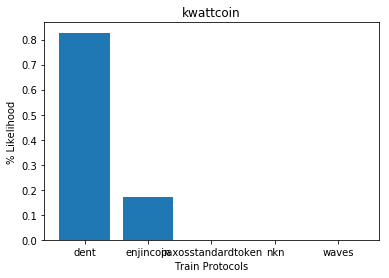

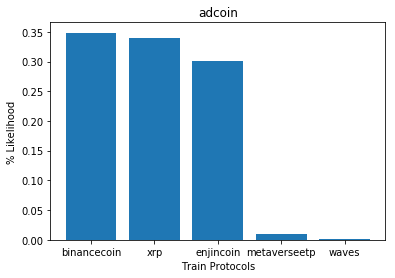

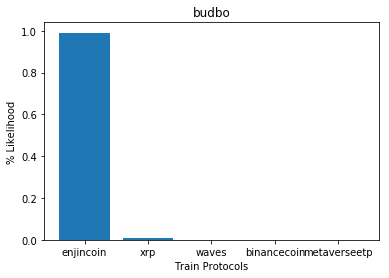

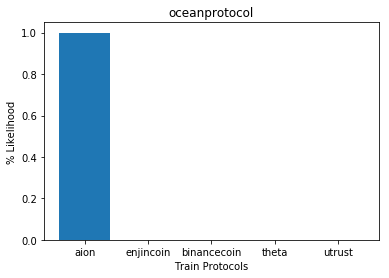

In [54]:
pd.options.display.float_format = '{}'.format
for index, row in df_test_1.iterrows():
    frame = pd.DataFrame()
    frame["weights"] = row["Model_1"]
    frame["label"] = labels
    frame = frame.sort_values(by="weights", ascending=False)
    frame = frame.head(5)
    plt.bar(frame.label, frame.weights)
    plt.title(row["Protocol"]) 
    plt.xlabel("Train Protocols")
    plt.ylabel("% Likelihood")
    plt.show()

In [60]:
#Model 2
df_test_2.head()

,Text,Protocol,Model_2
0,newwhitepaper,kwattcoin,none
1,disclaimer document document constitute prospe...,kwattcoin,none
2,coin represent ownership share public private ...,kwattcoin,none
3,coin coin purchase good service ecosystem,kwattcoin,roadmap
4,acquisition coin initial coin ering nonrefunda...,kwattcoin,sales


In [56]:
budbo = df_test_2[df_test_2.Protocol == 'budbo'].groupby(by="Model_2").count().sort_values(by="Text", ascending=False)
budbo['percentage'] = budbo['Text']/budbo['Text'].sum()

budbo = budbo.drop("none", axis=0).reset_index()


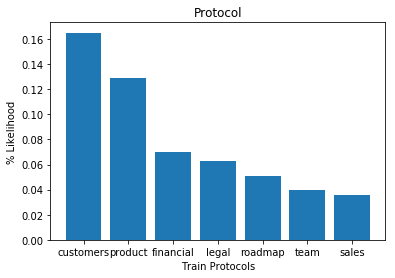

In [57]:
plt.bar(budbo.Model_2, budbo.percentage)
plt.title("Protocol") 
plt.xlabel("Train Protocols")
plt.ylabel("% Likelihood")
plt.show()

In [58]:
ocean = df_test_2[df_test_2.Protocol == 'oceanprotocol'].groupby(by="Model_2").count().sort_values(by="Text", ascending=False)

ocean['percentage'] = ocean['Text']/ocean['Text'].sum()

ocean = ocean.drop("none", axis=0).reset_index()


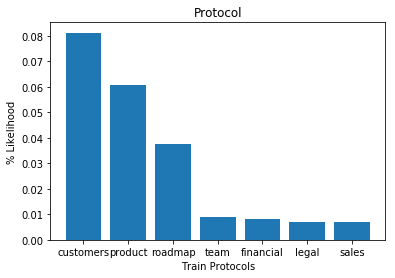

In [59]:
plt.bar(ocean.Model_2, ocean.percentage)
plt.title("Protocol") 
plt.xlabel("Train Protocols")
plt.ylabel("% Likelihood")
plt.show()

# 5- Inspiration

- https://towardsdatascience.com/applying-machine-learning-to-classify-an-unsupervised-text-document-e7bb6265f52
- https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a
- https://github.com/kavgan/nlp-in-practice/blob/master/word2vec/Word2Vec.ipynb